# MSA 2022 Phase 2 Data Science

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as datasets
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## Part 1: Exploratory Data Analysis



Weather Data
   station             valid  tmpc  dwpc   relh  sknt  gust  peak_wind_drct
0     NZAA  2015-01-01 00:00  21.0  11.0  52.77  15.0   NaN             NaN
1     NZAA  2015-01-01 00:30  21.0  10.0  49.37  16.0   NaN             NaN
2     NZAA  2015-01-01 01:00  21.0  12.0  56.38  16.0   NaN             NaN
3     NZAA  2015-01-01 01:30  21.0  13.0  60.21  16.0   NaN             NaN
4     NZAA  2015-01-01 02:00  21.0  12.0  56.38  16.0   NaN             NaN

Mean for Each Column
tmpc              15.811503
dwpc              12.115772
relh              79.782307
sknt               8.919029
gust              30.962594
peak_wind_drct          NaN
dtype: float64

Standard Deviation for Each Column
tmpc               4.235197
dwpc               3.738005
relh              12.562199
sknt               5.348379
gust               6.319510
peak_wind_drct          NaN
dtype: float64

Percentile (25%-75%) for Each Column
tmpc              16.00
dwpc              12.00
relh              81

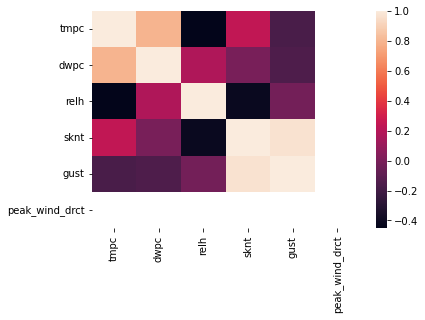

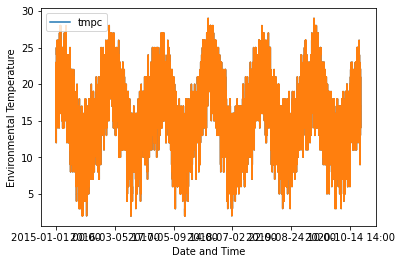

In [10]:
data = pd.read_csv("weather-data.csv")
print()

data_average = data[["tmpc", "dwpc", "relh", "sknt", "gust", "peak_wind_drct"]].mean()
data_std = data[["tmpc", "dwpc", "relh", "sknt", "gust", "peak_wind_drct"]].std()
data_quantile = data[["tmpc", "dwpc", "relh", "sknt", "gust", "peak_wind_drct"]].quantile()

print("Weather Data")
print(data.head())
print()

print("Mean for Each Column")
print(data_average)
print()

print("Standard Deviation for Each Column")
print(data_std)
print()

print("Percentile (25%-75%) for Each Column")
print(data_quantile)
print()

corr = data.corr()
sns.heatmap(corr, 
    xticklabels=corr.columns, 
    yticklabels=corr.columns)

data.plot.line("valid", "tmpc")
plt.ylabel("Environmental Temperature")
plt.xlabel("Date and Time")
plt.plot(data.valid, data.tmpc)
plt.show()

### Raw Dataframe

```
Weather Data
        station             valid  tmpc  dwpc   relh  sknt  gust  peak_wind_drct
0          NZAA  2015-01-01 00:00  21.0  11.0  52.77  15.0   NaN             NaN
1          NZAA  2015-01-01 00:30  21.0  10.0  49.37  16.0   NaN             NaN
2          NZAA  2015-01-01 01:00  21.0  12.0  56.38  16.0   NaN             NaN
3          NZAA  2015-01-01 01:30  21.0  13.0  60.21  16.0   NaN             NaN
4          NZAA  2015-01-01 02:00  21.0  12.0  56.38  16.0   NaN             NaN
...         ...               ...   ...   ...    ...   ...   ...             ...
103708     NZAA  2020-12-30 21:30  19.0  14.0  72.74   5.0   NaN             NaN
103709     NZAA  2020-12-30 22:00  19.0  14.0  72.74   6.0   NaN             NaN
103710     NZAA  2020-12-30 22:30  20.0  14.0  68.35   6.0   NaN             NaN
103711     NZAA  2020-12-30 23:00  20.0  14.0  68.35   7.0   NaN             NaN
103712     NZAA  2020-12-30 23:30  22.0  14.0  60.44   6.0   NaN             NaN
```

### Average

```
tmpc              15.811503
dwpc              12.115772
relh              79.782307
sknt               8.919029
gust              30.962594
peak_wind_drct          NaN
```

### Standard Deviation

```
tmpc               4.235197
dwpc               3.738005
relh              12.562199
sknt               5.348379
gust               6.319510
peak_wind_drct          NaN
```

### Percentile (25% - 75%)

```
tmpc              16.00
dwpc              12.00
relh              81.99
sknt               8.00
gust              31.00
peak_wind_drct      NaN
```

### Correlation Plot

![](Images/part1-correlation.png)

### Line Plot

![](Images/part1-line-tmpc.png)

### Comments

What I noticed in the dataset from the ```weather-data.csv``` file is that there was only very few data on the ```gust``` column and no data on the ```peak_wind_drct``` column. So when I process the data, I would remove the ```gust``` and ```peak_wind_drct``` columns.

Looking at the Correlation Plot for the dataset, there is a positive correlation between the ```tmpc``` and ```dwpc``` groups, but an approxaimate negative correlation when those two groups were conpared to the other groups. The ```peak_wind_drct``` noticcably lacks any data as stated above.

Looking at the Line Plot of the ```valid``` times and ```tmpc``` group, the environmental temperature increases and decreases as time goes on. It can be seen that the temperature peaks at about the beginning of the years and the troughs at about the middle of the year. This concides with the temperatures in the southern hemisphere, which is supported by the fact that the station where all of this data came from is the ```NZAA``` station which is very likely in New Zealand in the southern hemisphere.


## Part 2: Data Processing

In [18]:
data = data.drop(data.columns[[0, 6, 7]], axis=1)
train, test = train_test_split(data, test_size=0.2, random_state=0)
train = train.sort_values("valid") # Sorts data by date
test = test.sort_values("valid") # Sorts data by date
print(train.head())
print()
print(test.head())
print()

              valid  tmpc  dwpc   relh  sknt
0  2015-01-01 00:00  21.0  11.0  52.77  15.0
1  2015-01-01 00:30  21.0  10.0  49.37  16.0
2  2015-01-01 01:00  21.0  12.0  56.38  16.0
4  2015-01-01 02:00  21.0  12.0  56.38  16.0
5  2015-01-01 02:30  21.0  12.0  56.38  13.0

               valid  tmpc  dwpc   relh  sknt
3   2015-01-01 01:30  21.0  13.0  60.21  16.0
6   2015-01-01 03:00  21.0  11.0  52.77  15.0
9   2015-01-01 04:30  20.0  10.0  52.51  15.0
14  2015-01-01 07:00  18.0  11.0  63.60  13.0
17  2015-01-01 08:30  17.0  10.0  63.38  10.0



To prepare our data before we model, we remove data that we deem "useless". We will be removing the following columns ```station```, ```gust```, and ```peak_wind_drct```. The ```station``` column will be removed because it appears that the station for all of the data is ```NZAA```, but even if we're uncertain whether all of the stations would be the same, the station won't provide help for the modelling. We would be removing the ```gust``` and ```peak_wind_drct``` columns because their data is not complete so it would affect our model.

Once we have created our training and testing datasts, we are ready to model our dataset.

### Part 3: Data Modelling ###

In [ ]:
# Part 3 Code

Markdown Stuff